# Computations of Variants of Kohnen's conjecture for Hermitian modular forms

This notebook contains basic implementations of algorithms from the paper "Variants of Kohnen's conjecture for Hermitian modular forms" by B. Paul and S. K. Singh. 

Let $S_k(\Gamma_2, \det^{k/2})$ be the space of Hermitian modular for the modular group $\Gamma_2$ over the field $\mathbb{Q}(i)$ with character $\det^{k/2}$. Any $F \in S_k(\Gamma_2, \det^{k/2})$ has Fourier-Jacobi expansion 
$$
F(Z) ~=~\sum_{m\ge 1} \phi_m(\tau, z, w)e^{2\pi im\tau'},
$$
where $\phi_m$'s are Hermitian-Jacobi forms. Let $F$ is a Hecke eigenform and let $\lambda_F(n)=\frac{\langle \phi_{n}, \phi_{n} \rangle}{\langle \phi_1, \phi_1 \rangle}$. In this Notebook, we will present an implementation of 
$$
\lim_{m \to \infty}\frac{\lambda_F(p^m)}{p^m(k-1)},
$$
where $F$ is a Hecke eigenform in the Maass subspace $S_k^*(\Gamma_2, \det^{k/2})$. By Lemma 12 of the article, we know that 
\begin{equation}
\lambda_F(m):=\sum_{d|m} \psi(d) d^{k-2} \lambda_{\phi_1}\left(\frac{m}{d}\right), \tag{1}
\end{equation}
where $\psi(m) := m\prod_{p|m}(1+1/p) $ and $\lambda_{\phi_1}(n)$  is defined by $T_n\phi_1 = \lambda_{\phi_1}(n) \phi_1$.  Kreig proved that there is an isomorphism also known as "Saito--Kurokawa descent" $ \Omega: S_k^*(\Gamma_2, {\rm det}^{k/2}) \rightarrow S_{k-1}^+(\Gamma_0(4), \chi_{-4})$. Using this isomorphism we get (see Corollary 11)
$$
\lambda_{\phi_1}(p^m)= \begin{cases}\sum\limits_{0 \le r \le [m/2]} p^{2r(k-2)}a\left(p^{2(m-2r)}\right)- 
\frac{\chi_{-4}(p)}{p} \sum\limits_{0 \le r \le [\frac{m-1}{2}]} p^{(2r+1)(k-2)}a\left(p^{2(m-2r-1)}\right) 
& \text{ if } p \ge 3,\\
\sum \limits_{m_1, m_2 \ge 0 \atop m_1+m_2=m} a(2)^{2m_1}\overline{a(2)^{2m_2}}
& \text{ if } p =2,
\end{cases} \tag{2}
$$
whre $a(p)$ is the $p$th Fourier coeffcients of a Hecke eigenform $f\in S_k(\Gamma_0(4), \chi_{-4})$ such that $f\not =f^{\rho}$. Here $f^{\rho}=\overline{f(-\overline{z})}$.

## Recurrence relation
From Equation (1) we can derive the following recurrence relation for a fixed prime $p$ and any $m \in \mathbb{N}$
$$
\lambda_F(p^m) = p^{k-1} \lambda_F(p^{m-1}) + \lambda_{\phi_1}(p^m) + p^{k-2}\lambda_{\phi_1}(p^{m-1}).
$$
Let $b(m) := \lambda_{\phi_1}(p^m) + p^{k-2}\lambda_{\phi_1}(p^{m-1})$. 
Using above recurrence relations one finds 
$$
\frac{\lambda_F(p^m)}{p^{m(k-1)}} = 1+ \sum_{r=1}^{m} p^{-r(k-1)}b(r).  \tag{3}
$$
Using Deligne's bounds, $|a(p^m)| \le (m+1)p^{m(k-2)/2}$, and Equation (2), we can find the upper bound and lower bound for $b(m)$ and hence both upper and lower bounds for $\lambda_F(p^m)p^{-m(k-1)}$.

## Upper Bound

Using Deligne bound in Equation (2), we find that
$$
1+\sum_{r=1}^{\infty}p^{-r(k-1)}|b(r)| \le \begin{cases}\sum_{r=0}^{\infty}p^{-r}\left((r+1)^2-\frac{r^2\chi(p)}{p}\right)=\frac{(p^2-\chi(p))(p+1)}{(p-1)^3} & ~ \mbox{for}~p \ge 3\\
\sum_{r=0}^{\infty}~p^{-r}(2r+1)=6 & ~ \mbox{for}~p =2
\end{cases} \tag{4}
$$
This proves that the $\lim\limits_{m\to \infty}\frac{\lambda_F(p^m)}{p^{m(k-1)}}$ exist and also provides an upper bound for the limit value. Below, we provide a code for computing the upper bound using the above formula.

In [38]:
from sage.modular.dirichlet import DirichletCharacter, DirichletGroup
from sage.rings.complex_mpfr import ComplexNumber, ComplexField
from sage.rings.real_mpfr import RealNumber as RealNumber_class
from sage.arith.misc import is_prime
from sage.rings.number_field.number_field import CyclotomicField
from sage.rings.integer import Integer
# User defined type for either Python int or Sage Integer
Integer_t = Integer | int
Real_t = RealNumber_class | float
Complex_t = ComplexNumber | complex
CF=ComplexField(60)

def Upper_bound_formula(p: Integer_t) -> Complex_t:
    r"""
    It gives the upper bound value for $\lim_{m\to \infty}\frac{\lambda(p^m)}{p^{m(k-1)}}$ calculated using the formula in Equation 4.
    INPUT:

    - ``p`` -- integer

    EXAMPLES::
        sage: Upper_bound_formula(2)
        6.0000000000000000
        sage: Upper_bound_formula(7)
        1.8518518518518519
        sage: Upper_bound_formula(97)
        1.0421006944444444
        
    """
    if not is_prime(p):
        raise ValueError("Call with a prime p!")
    H = DirichletGroup(4, base_ring=CyclotomicField(2))
    chi = DirichletCharacter(H, H._module([1]))
    if p==2:
        return CF(6)
    else:
        return CF((p ** 2 - chi(p)) * (p + 1) / (p - 1) ** 3)


In [39]:
Upper_bound_formula(23)

1.1945905334335086

## Lower Bound

Using Deligne bound in Equation (2), we find that
$$
\lim_{m\to \infty}\frac{\lambda_F(p^m)}{p^m(k-1)}=1+\sum_{r=1}^{\infty}p^{-r(k-1)}b(r) \ge 1+\sum_{r=0}^{\infty}-p^{-r}\left(r^2+2r-1-\frac{\chi(p)}{p}(r^2-2)\right)=\frac{(p^2-\chi(p))(p^2-5p+2)}{p(p-1)^3} \quad \quad \mbox{for}~ p\ge 5  \tag{5}
$$
We would like to remark that using Deligne's bound in Equation (2) does not provide a positive bound for the prime $p=2, 3$. For instance, if $p=3$ then using Deligne bound we get a lower bound 
$$
\lim_{m\to \infty}\frac{\lambda_F(3^m)}{3^m(k-1)} \ge -\frac{31}{24}
$$
which is useless as we already know that the limit is greater than or equal to $0$. Below, we provide a code for computing the Lower bound for $p\ge 5$ using the above formula.

In [40]:
def Lower_bound_formula(p: Integer_t) -> Complex_t:
    r"""
    It gives the Lower bound for $\lim_{m\to \infty}\frac{\lambda(p^m)}{p^{m(k-1)}}$ calculated using the formula in Equation 5.
    INPUT:

    - ``p`` -- integer

    EXAMPLES::
        sage: Lower_bound_formula(2)
        0.000000000000000
        sage: Lower_bound_formula(7)
        0.529100529100529
        sage: Lower_bound_formula(97)
        0.978517862256586
    """
    if not is_prime(p):
        raise ValueError("Call with a prime p!")
    H = DirichletGroup(4, base_ring=CyclotomicField(2))
    chi = DirichletCharacter(H, H._module([1]))
    if p == 2:
        return CF(0)
    elif p == 3:
        return CF(0)
    else:
        return CF(((p ** 2 - chi(p)) * (p ** 2 - 5 * p + 2)) / (p * (p - 1) ** 3))

In [41]:
Lower_bound_formula(23)

0.90027112664554274

## Questions


We observed that we are getting a negative lower bound for the primes $p = 2, 3$. This makes it interesting to calculate 
$
\lim_{m \to \infty} \frac{\lambda_F(p^m)}{p^m(k-1)}
$
for all Hecke eigenforms $F \in S_k^*(\Gamma_2, \det^{k/2})$ and for $k$ less than some large finite number, and check for their minimum. Since we did not obtain any positive bound for $p = 2, 3$, it might be possible that the minimum is very close to zero. For other primes, we can compare the maxima and minima with the upper and lower bounds calculated using the formula and check how strong our bounds are.


## Computing $\lim\limits_{m\to \infty}\frac{\lambda_F(p^m)}{p^{m(k-1)}}$

Suppose $F\in S_k(\Gamma_2, \det^{k/2})$. We know that
$$
\lim_{m\to \infty}\frac{\lambda_F(p^m)}{p^{m(k-1)}}=1+ \sum_{r=1}^{\infty} p^{-r(k-1)}b(r)
$$
and 
$$
b(r)=\begin{cases}  a(p^{2r})+\left(1-\frac{\chi_{-4}(p)}{p}\right)\sum\limits_{1 \le i \le \frac{r}{2}} p^{2i(k-2)}a\left(p^{2(r-2i)}\right)+\left(1-\frac{\chi_{-4}(p)}{p}\right)\sum\limits_{0 \le i \le \frac{r}{2}-1} p^{(2i+1)(k-2)}a\left(p^{2(r-2i-1)}\right) &  \mbox{if $r$ is even,}\\ a(p^{2r})+\left(1-\frac{\chi_{-4}(p)}{p}\right)\sum\limits_{0 \le i \le \frac{m-1}{2}} p^{(2i+1)(k-2)}a\left(p^{2(m-2i-1)}\right)+\left(1-\frac{\chi_{-4}(p)}{p}\right)
\sum\limits_{1 \le i \le \frac{m-1}{2}} p^{2i(k-2)}a\left(p^{2(r-2i)}\right) &  \mbox{if $r$ is odd.}
\end{cases}
$$
Therefore we see that to calculate the $\lim_{m\to \infty}\frac{\lambda_F(p^m)}{p^{m(k-1)}}$ we need the value of $b(r)$ and to calculate $b(r)$ we need the value of $a(p)$ where $a(p)$ is the Fourier coefficient of the Hecke eigenform $f\in S_{k-1}(\Gamma_0(4), \chi_{-4})$ such that $f\not =f^{\rho}$. Below we provide a code that gives the coefficients $a_f(p)$ of all Hecke eigenform $f\in S_{k-1}(\Gamma_0(4), \chi_{-4})$ such that $f\not =f^{\rho}$.

In [43]:
from typing import List, Any
from sage.modular.modform.constructor import Newforms, Newform
def calculating_coefficients(p: Integer_t, k: Integer_t) -> list[Any]:
    r"""
    Let $g'(z)=\overline{g(\overline{-z})}$. The space of elliptic modular forms $ S_K(\Gamma_0(4), \chi_{-4})$
    contains a basis $g_1, g_1', \cdots, g_a, g_a', g_{a+1}, \cdots, g_{a+b}$ consisting of normalized
    Hecke eigenforms in the sense of Atkin-Lehner satisfying $g_j \not = g_j'$ for $1 \le j \le a$ and
    $g_j=g_j'$ for $a< j \le a+b$. The function return the coefficients $c_{g_j}(p)$ for $1 \le j a$.

    INPUT:

    - ``p`` -- integer
    - ``k`` -- integer

    EXAMPLES::
        sage: calculating_coefficients(2, 13)
        [-6.60059523282289 + 63.6587161555465*I, 60.6005952328229 + 20.5807642576160*I]
        sage: calculating_coefficients(5, 37)
        [5.55508442336656e12,
        8.84655879449296e11,
        3.33360065084839e12,
        -1.24079880462083e12,
        6.60636097714819e12,
        4.97997961882345e11,
        -7.52461405468348e12,
        1.46295903798631e12]
    """
    if not is_prime(p):
        raise ValueError("Call with a prime p!")
    if not k > 1:
        raise ValueError("Call with positive integer k>1!")
    H = DirichletGroup(4, base_ring=CyclotomicField(2))
    chi = DirichletCharacter(H, H._module([1]))
    N = Newforms(chi, k, names="a")
    t = len(N)
    wts = []
    if (t > 0):
        for r in range(0, t):
            f = N[r]
            s = f.hecke_eigenvalue_field().degree()
            if (s > 1):
                if (p % 4 == 3):
                    g = f.q_expansion(p + 1).coefficients()[p - 1].complex_embeddings()
                    for v in range(0, len(g)):
                        if (g[v].imag() > 0):
                            wts.append(CF(0, g[v].imag()))
                elif (p % 4 == 1):
                    g = f.q_expansion(p + 1).coefficients()[p - 1].complex_embeddings()
                    for v in range(0, len(g)):
                        if (v % 2 == 0):
                            wts.append(g[v].real())
                else:
                    g = f.q_expansion(p + 1).coefficients()[p - 1].complex_embeddings()
                    for v in range(0, len(g)):
                        if (g[v].imag() > 0):
                            wts.append(g[v])

    return wts

In [44]:
calculating_coefficients(5, 13)  

[-15342.1904745033, 6162.19047450332]

sage: calculating_coefficients(5, 13)

[-15342.1904745033, 6162.19047450332]

Tha output tells us that there are 2 Hecke eigenforms of weight 13 in $S_{13}(\Gamma_0(4), \chi_{-4})$ such that $f\not = f^{\rho}$ and 
$$
a_{f_1}(5)=-15342.1904745033, \quad a_{f_2}(5)=6162.19047450332.
$$



In the below we provide a code which calculate the  $\lim_{m\to \infty}\frac{\lambda_F(p^m)}{p^{m(k-1)}}$ for all Hecke eigenform $F\in S_k^*(\Gamma_2, \det^{k/2})$ for a fixed prime $p$.

In [45]:
def limit_values(p: Integer_t, k: Integer_t) -> list[Any]:
    r"""
    The limit_values(p, k) return the values of lim{m\to infty}\frac{\lambda_F(p^m)}{p^{m(k-1)}} for all Hecke Hecke eigenforms in
    the Maass subspace $S_k(\Gamma_2, \det^{k/2})$.

    INPUT:

    - ``p`` -- integer
    - ``k`` -- integer

    EXAMPLES::
        sage: limit_values(5, 14)
        [1.1546099697600292, 1.0220791430964873]
        sage: limit_values(13, 22)
        [1.0000228555985224,
        1.0074953895024491,
        1.2821687107561900,
        1.1287647576670844]
    """
    if not is_prime(p):
        raise ValueError("Call with a prime p!")
    if not k > 2:
        raise ValueError("Call with non-negative integer k>2!")
    H = DirichletGroup(4, base_ring=CyclotomicField(2))
    chi = DirichletCharacter(H, H._module([1]))
    wts = calculating_coefficients(p, k - 1)
    t = len(wts)
    qts = []
    for i in range(0, t):
        z = 0
        temp = CF(wts[i])
        r = 0
        s = 1
        mts = []
        mts.append(CF(1))
        mts.append(temp)
        while (abs(s) > 1e-14):
            if p == 2:
                sum1 = 0
                for j in range(0, r + 1):
                    sum1 = sum1 + mts[1] ** (2 * j) * mts[1].conjugate() ** (2 * r - 2 * j)
                sum2 = 0
                for j in range(0, r):
                    sum2 = sum2 + mts[1] ** (2 * j) * mts[1].conjugate() ** (2 * r - 2 * j - 2)
                sum3 = sum1 + p ** (k - 2) * sum2
            else:
                if (r > 0):
                    for j in range(2 * r, 2 * (r + 1)):
                        bhs = mts[1] * mts[j - 1] - CF(chi(p) * p ** (k - 2)) * mts[j - 2]
                        mts.append(bhs)
                if r == 0:
                    sum3 = 1
                elif r % 2 == 0:
                    sum1 = 0
                    for j in range(1, int(r / 2) + 1):
                        sum1 = sum1 + p ** (2 * j * (k - 2)) * mts[2 * (r - 2 * j)]
                    sum2 = 0
                    for j in range(0, int(r / 2)):
                        sum2 = sum2 + p ** ((2 * j + 1) * (k - 2)) * mts[2 * (r - 2 * j - 1)]
                    sum3 = (1 - chi(p) / p) * (sum1 + sum2)
                    sum3 = sum3 + mts[2 * r]
                else:
                    sum1 = 0
                    for j in range(0, int((r - 1) / 2) + 1):
                        sum1 = sum1 + p ** ((2 * j + 1) * (k - 2)) * mts[2 * (r - 2 * j - 1)]
                    sum2 = 0
                    for j in range(1, int((r - 1) / 2) + 1):
                        sum2 = sum2 + p ** ((2 * j) * (k - 2)) * mts[2 * (r - 2 * j)]
                    sum3 = (1 - chi(p) / p) * (sum1 + sum2)
                    sum3 = sum3 + mts[2 * r]
            s = p ** (-r * (k - 1)) * sum3
            # print(s)
            r += 1
            z = z + s
        qts.append(z)
    return qts


In [46]:
limit_values(5, 14) 

[1.1546099697600292, 1.0220791430964873]

sage: limit_values(5, 14) 

[1.1546099697600292, 1.0220791430964873]

The output tells us  that there are two Hecke eigenform $F_1, F_2 \in S_{14}^*(\Gamma_2, \det^{7})$ and  
$$
\lim_{m\to \infty}\frac{\lambda_{F_1}(5^m)}{5^{m(k-1)}}=1.1546099697600292, \quad \quad \lim_{m\to \infty}\frac{\lambda_{F_2}(5^m)}{5^{m(k-1)}}=1.0220791430964873.
$$

In the below we provide a code to calculate the maximum and minimum values of all the limit values.
 

In [47]:
def max_min_limit_values(p, max_2k):
    r"""
    Return the maximum and minimum of   of all $\lim_{m\to \infty}\frac{\lambda(p^m)}{p^{m(k-1)}}$ upto the weight max_2k.
    INPUT:

    - ``p`` -- integer
    -``max_2k`` -- integer

    EXAMPLES::
        sage: max_min_limit_values(2, 10)
        (1.0212765957446674, 0.70588235294117781)
        sage: max_min_limit_values(7, 24)
        (1.3834681496043004, 0.87676309738584239)
        sage: max_min_limit_values(97, 30)
        (1.0377934796468053, 1.0000086343373926)
    """
    if not is_prime(p):
        raise ValueError("Call with a prime p!")
    if not max_2k>6 :
        raise ValueError(f'Hermitian cusp forms space is empty for k  less than equal to {max_2k}. Enter a weight k greater than {max_2k}')
    if not max_2k % 2 ==0:
        raise ValueError("Hermitian cusp form space is empty for odd weight k. Enter an even k")
    qts = []
    for r in range(4, int(max_2k / 2) + 1):
        x = limit_values(p, 2 * r)
        for s in range(0, len(x)):
            qts.append(x[s].real())
    return (max(qts), min(qts))


In [48]:
max_min_limit_values(5, 10)

(1.1524750040976862, 1.0008896797153013)

We shall denote by
$$
U_{p, k}=\max\bigg\{\frac{\lambda_F(p^m)}{p^{(m(k_1-1))}}| F~ \mbox{is a Hecke eigenform in $S_{k_1}^*(\Gamma_2, \det^{k_1/2})$}, ~k_1\le k\bigg\}
$$
and 
$$
L_{p, k}=\min\bigg\{\frac{\lambda_F(p^m)}{p^{(m(k_1-1))}}| F~ \mbox{is a Hecke eigenform in $S_{k_1}^*(\Gamma_2, \det^{k_1/2})$}, ~k_1\le k\bigg\}. 
$$

sage: max_min_limit_values(5, 10)

(1.1524750040976862, 1.0008896797153013)

The output tells us that $U_{5, 10}=1.1524750040976862$ and $L_{5, 10}=1.0008896797153013$. 


We run the above codes  on the University of Nottingham server and produces the following table for the primes $p=2, 3$. The data is available to load from the file  'graph.sobj'.

| Weight |  $U_{2, k}  $            |  $L_{2, k}$              | $U_{3, k}$               | $L_{3, k}$               |
|--------|--------------------------|--------------------------|--------------------------|--------------------------|
| 8      | 0.7058823529             | 0.7058823529             | 1.2577639752             | 1.2577639752             |
| 10     | 1.0212765957             | 0.7058823529             | 1.2577639752             | 1.1675208200             |
| 12     | 1.5263329105             | 0.7058823529             | 2.1119996187             | 1.0004169779             |
| 14     | 3.2835672748             | 0.6730300515             | 2.2300603811             | 0.7479352765             |
| 16     | 3.2835672748             | 0.6730300515             | 2.2300603811             | 0.7479352765             |
| 18     | 3.2835672748             | 0.6700373801             | 2.2300603811             | 0.7479352765             |
| 20     | 5.8275159915             | 0.6700373801             | 2.4201593332             | 0.7479352765             |
| 22     | 5.8275159915             | 0.6700373801             | 2.4201593332             | 0.7028338159             |
| 24     | 5.8275159915             | 0.6700373801             | 2.4201593332             | 0.7028338159             |
| 26     | 5.8275159915             | 0.6700373801             | 2.4201593332             | 0.7028338159             |
| 28     | 5.8275159915             | 0.6690616778             | 2.4892059247             | 0.7028338159             |
| 30     | 5.8275159915             | 0.6690616778             | 2.4924209792             | 0.7028338159             |
| 32     | 5.8275159915             | 0.6669480854             | 2.4924209792             | 0.6793014804             |
| 34     | 5.8275159915             | 0.6669480854             | 2.4924209792             | 0.6793014804             |
| 36     | 5.8275159915             | 0.6669480854             | 2.4924209792             | 0.6793014804             |
| 38     | 5.8275159915             | 0.6669480854             | 2.4924209792             | 0.6793014804             |
| 40     | 5.8275159915             | 0.6669480854             | 2.4939121118             | 0.6422402371             |
| 42     | 5.8275159915             | 0.6669480854             | 2.4939121118             | 0.6422402371             |
| 44     | 5.8275159915             | 0.6669480854             | 2.4967342660             | 0.6422402371             |
| 46     | 5.8275159915             | 0.6669480854             | 2.4967342660             | 0.6422402371             |
| 48     | 5.8275159915             | 0.6669480854             | 2.4997019081             | 0.6422402371             |
| 50     | 5.8275159915             | 0.6669480854             | 2.4997019081             | 0.6422402371             |
| 52     | 5.8275159915             | 0.6669480854             | 2.4997019081             | 0.6422402371             |
| 54     | 5.8275159915             | 0.6669480854             | 2.4997019081             | 0.6422402371             |
| 56     | 5.9472604193             | 0.6666687672             | 2.4997019081             | 0.6422402371             |
| 58     | 5.9472604193             | 0.6666687672             | 2.4997019081             | 0.6422402371             |
| 60     | 5.9531141234             | 0.6666687672             | 2.4997019081             | 0.6422402371             |
| 62     | 5.9531141234             | 0.6666687672             | 2.4997019081             | 0.6422402371             |
| 64     | 5.9531141234             | 0.6666687672             | 2.4997019081             | 0.6422402371             |
| 66     | 5.9531141234             | 0.6666687672             | 2.4997019081             | 0.6422402371             |
| 68     | 5.9531141234             | 0.6666687672             | 2.4997019081             | 0.6422402371             |
| 70     | 5.9531141234             | 0.6666687672             | 2.4997019081             | 0.6353190460             |
| 72     | 5.9531141234             | 0.6666687672             | 2.4997019081             | 0.6353190460             |
| 74     | 5.9957174613             | 0.6666687672             | 2.4997019081             | 0.6353190460             |
| 76     | 5.9957174613             | 0.6666687672             | 2.4997019081             | 0.6353190460             |
| 78     | 5.9957174613             | 0.6666687672             | 2.4997019081             | 0.6353190460             |
| 80     | 5.9957174613             | 0.6666687672             | 2.4997019081             | 0.6353190460             |
| 82     | 5.9957174613             | 0.6666687672             | 2.4997019081             | 0.6353190460             |
| 84     | 5.9957174613             | 0.6666687672             | 2.4997019081             | 0.6353190460             |
| 86     | 5.9957174613             | 0.6666687672             | 2.4997019081             | 0.6353190460             |
| 88     | 5.9957174613             | 0.6666687672             | 2.4999270780             | 0.6353190460             |
| 90     | 5.9957174613             | 0.6666687672             | 2.4999270780             | 0.6353190460             |
| 92     | 5.9957174613             | 0.6666687672             | 2.4999270780             | 0.6353190460             |
| 94     | 5.9957174613             | 0.6666687672             | 2.4999270780             | 0.6353190460             |
| 96     | 5.9957174613             | 0.6666687672             | 2.4999270780             | 0.6353190460             |
| 98     | 5.9957174613             | 0.6666687672             | 2.4999270780             | 0.6353190460             |
| 100    | 5.9957174613             | 0.6666669105             | 2.4999270780             | 0.6353190460             |




### Observations:
1) It seems that $L_{2, k}$ is converging to $\frac{20}{3}$ as we increase $k$ and $U_{2, k}$ is converging to $6$. Note that our upper bound for prime $p=2$ is $6$ from the formula. So our upper bound is optimal.
   
2) It seems that $U_{3, k}$ is converging to $2.5$. From the above data it is hard to say a converging point for $L_{3, k}$ but it seems that the converging point will be greater than 0.6.

We propose the following conjecture for prime p=2, 3.

##### Conjecture 1: 
For $p=2$, we have
$$
\frac{20}{3} \le \lim_{m \to \infty} \frac{\lambda(2^m)}{2^{m(k-1)}} 
$$
and for the primes $p= 3$, we have 
$$
0.6 < \lim_{m \to \infty} \frac{\lambda(3^m)}{3^{m(k-1)}}  \le 2.5.
$$

Next, we calculate $U_{p, 100}$ and $L_{p, 100}$ for all prime less 200 and compare them with the Upper and Lower bound. The results are given in the following table and the data is available to load from the files: 'bounds_2.sobj',  'bounds_3.sobj'


<table>
  <thead>
    <tr>
      <th>Prime</th>
      <th>$U_{p, 100}$</th>
      <th>Upper bound formula</th>
      <th>$L_{p, 100}$</th>
      <th>Lower bound Formula</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>2</td>
      <td>5.995717461</td>
      <td>6.0</td>
      <td>0.666666910</td>
      <td>0.0</td>
    </tr>
    <tr>
      <td>3</td>
      <td>2.499927078</td>
      <td>5.0</td>
      <td>0.635319046</td>
      <td>0.0</td>
    </tr>
    <tr>
      <td>5</td>
      <td>2.2200344434</td>
      <td>2.25</td>
      <td>1.0000077989</td>
      <td>0.15</td>
    </tr>
    <tr>
      <td>7</td>
      <td>1.3888886428</td>
      <td>1.8518518519</td>
      <td>0.7854287016</td>
      <td>0.5291005291</td>
    </tr>
    <tr>
      <td>11</td>
      <td>1.2199997912</td>
      <td>1.464</td>
      <td>0.8485951197</td>
      <td>0.7541818182</td>
    </tr>
    <tr>
      <td>13</td>
      <td>1.3447547628</td>
      <td>1.3611111111</td>
      <td>1.0000000018</td>
      <td>0.7927350427</td>
    </tr>
    <tr>
      <td>17</td>
      <td>1.2576645431</td>
      <td>1.265625</td>
      <td>1.0000008252</td>
      <td>0.8520220588</td>
    </tr>
    <tr>
      <td>19</td>
      <td>1.1172829043</td>
      <td>1.2414266118</td>
      <td>0.9097146401</td>
      <td>0.8755324525</td>
    </tr>
    <tr>
      <td>23</td>
      <td>1.0950412688</td>
      <td>1.1945905334</td>
      <td>0.922025515</td>
      <td>0.9002711266</td>
    </tr>
    <tr>
      <td>29</td>
      <td>1.1447071296</td>
      <td>1.1479591837</td>
      <td>1.0000018673</td>
      <td>0.9210063336</td>
    </tr>
    <tr>
      <td>31</td>
      <td>1.0688888609</td>
      <td>1.1401481481</td>
      <td>0.9424792733</td>
      <td>0.9286690562</td>
    </tr>
    <tr>
      <td>37</td>
      <td>1.1136019584</td>
      <td>1.1141975309</td>
      <td>1.0000000113</td>
      <td>0.9398565232</td>
    </tr>
    <tr>
      <td>41</td>
      <td>1.0986519298</td>
      <td>1.1025</td>
      <td>1.0000000976</td>
      <td>0.9462804878</td>
    </tr>
    <tr>
      <td>43</td>
      <td>1.0487516089</td>
      <td>1.0986934456</td>
      <td>0.9588527823</td>
      <td>0.9500330217</td>
    </tr>
    <tr>
      <td>47</td>
      <td>1.0444223731</td>
      <td>1.0898331553</td>
      <td>0.9629856109</td>
      <td>0.954570175</td>
    </tr>
    <tr>
      <td>53</td>
      <td>1.0749169215</td>
      <td>1.0784023669</td>
      <td>1.0000000117</td>
      <td>0.9593334822</td>
    </tr>
    <tr>
      <td>59</td>
      <td>1.0350772752</td>
      <td>1.0707696093</td>
      <td>0.9685594083</td>
      <td>0.9642976029</td>
    </tr>
    <tr>
      <td>61</td>
      <td>1.0642531076</td>
      <td>1.0677777778</td>
      <td>1.0000001166</td>
      <td>0.9650091075</td>
    </tr>
    <tr>
      <td>67</td>
      <td>1.0307621635</td>
      <td>1.0619973843</td>
      <td>0.9711443799</td>
      <td>0.96875793</td>
    </tr>
    <tr>
      <td>71</td>
      <td>1.028979587</td>
      <td>1.0583790087</td>
      <td>0.973374334</td>
      <td>0.9705948343</td>
    </tr>
    <tr>
      <td>73</td>
      <td>1.0541829068</td>
      <td>1.0563271605</td>
      <td>1.0000000473</td>
      <td>0.9710700998</td>
    </tr>
    <tr>
      <td>79</td>
      <td>1.0259692972</td>
      <td>1.0522766736</td>
      <td>0.9759751611</td>
      <td>0.973688922</td>
    </tr>
    <tr>
      <td>83</td>
      <td>1.0246876859</td>
      <td>1.0496800685</td>
      <td>0.9773604902</td>
      <td>0.9750040338</td>
    </tr>
    <tr>
      <td>89</td>
      <td>1.0440742714</td>
      <td>1.0459710744</td>
      <td>1.0000001298</td>
      <td>0.9765008357</td>
    </tr>
    <tr>
      <td>97</td>
      <td>1.0411594294</td>
      <td>1.0421006944</td>
      <td>1.0000001522</td>
      <td>0.9785178623</td>
    </tr>
    <tr>
      <td>101</td>
      <td>1.0387707696</td>
      <td>1.0404</td>
      <td>1.0000000628</td>
      <td>0.9794019802</td>
    </tr>
    <tr>
      <td>103</td>
      <td>1.0198000641</td>
      <td>1.0397961568</td>
      <td>0.9821520352</td>
      <td>0.9800020537</td>
    </tr>
    <tr>
      <td>107</td>
      <td>1.0190459177</td>
      <td>1.0382732054</td>
      <td>0.9821626291</td>
      <td>0.9807710549</td>
    </tr>
    <tr>
      <td>109</td>
      <td>1.036259687</td>
      <td>1.0373799726</td>
      <td>1.0000000341</td>
      <td>0.9809686513</td>
    </tr>
    <tr>
      <td>113</td>
      <td>1.0355477231</td>
      <td>1.0360331633</td>
      <td>1.0000003646</td>
      <td>0.9816659518</td>
    </tr>
    <tr>
      <td>127</td>
      <td>1.0159989706</td>
      <td>1.0321259603</td>
      <td>0.9857843982</td>
      <td>0.9838720399</td>
    </tr>
    <tr>
      <td>131</td>
      <td>1.0155029453</td>
      <td>1.031126081</td>
      <td>0.9853399274</td>
      <td>0.9843759742</td>
    </tr>
    <tr>
      <td>137</td>
      <td>1.0288156781</td>
      <td>1.0296280277</td>
      <td>1.0000000099</td>
      <td>0.9849705125</td>
    </tr>
    <tr>
      <td>139</td>
      <td>1.0145977103</td>
      <td>1.0293020891</td>
      <td>0.9867807709</td>
      <td>0.9852949289</td>
    </tr>
    <tr>
      <td>149</td>
      <td>1.0269710916</td>
      <td>1.0272096421</td>
      <td>1.0000001188</td>
      <td>0.9862131767</td>
    </tr>
    <tr>
      <td>151</td>
      <td>1.0134222181</td>
      <td>1.0269345185</td>
      <td>0.9870221644</td>
      <td>0.986487115</td>
    </tr>
    <tr>
      <td>157</td>
      <td>1.0252609745</td>
      <td>1.0258053912</td>
      <td>1.0000004906</td>
      <td>0.9869334623</td>
    </tr>
    <tr>
      <td>163</td>
      <td>1.0124218862</td>
      <td>1.0249209225</td>
      <td>0.9894203403</td>
      <td>0.9875004968</td>
    </tr>
    <tr>
      <td>167</td>
      <td>1.0121207674</td>
      <td>1.0243149984</td>
      <td>0.9885483841</td>
      <td>0.9878053392</td>
    </tr>
    <tr>
      <td>173</td>
      <td>1.0231037718</td>
      <td>1.0233910222</td>
      <td>1.0000000222</td>
      <td>0.9881696715</td>
    </tr>
    <tr>
      <td>179</td>
      <td>1.011299063</td>
      <td>1.0226619894</td>
      <td>0.9894032588</td>
      <td>0.9886367364</td>
    </tr>
    <tr>
      <td>181</td>
      <td>1.0213688261</td>
      <td>1.022345679</td>
      <td>1.0000001434</td>
      <td>0.9887040447</td>
    </tr>
    <tr>
      <td>191</td>
      <td>1.0105817115</td>
      <td>1.0212194197</td>
      <td>0.9903474664</td>
      <td>0.9893620076</td>
    </tr>
    <tr>
      <td>193</td>
      <td>1.0206099536</td>
      <td>1.0209418403</td>
      <td>1.0000000112</td>
      <td>0.989420854</td>
    </tr>
    <tr>
      <td>197</td>
      <td>1.0204875867</td>
      <td>1.0205122865</td>
      <td>1.0000000002</td>
      <td>0.9896399977</td>
    </tr>
    <tr>
      <td>199</td>
      <td>1.0101520251</td>
      <td>1.0203555811</td>
      <td>0.9903951434</td>
      <td>0.9897961878</td>
    </tr>
  </tbody>
</table>


Let's plot a graph for the above data to gain more insights.

Plot saved successfully.


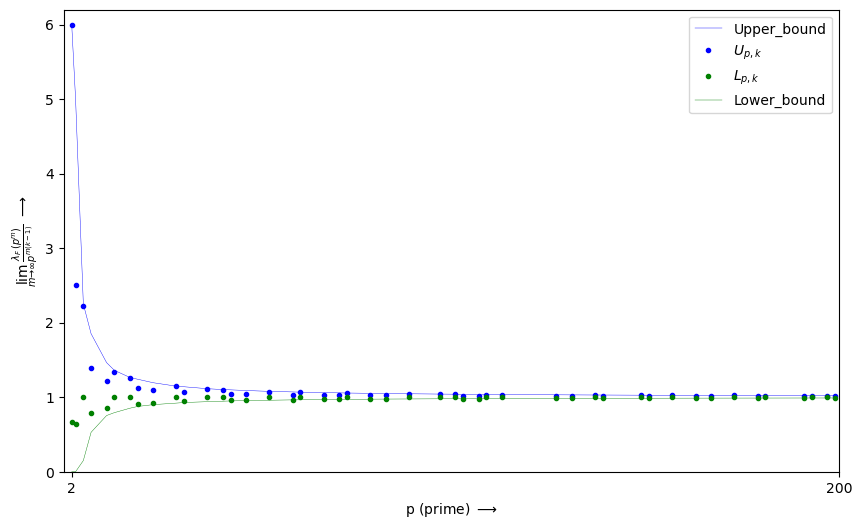

In [49]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['text.usetex'] = False
x_data=load('graph.sobj')
quantity1=[]
quantity2=[] 
quantity3=[]
quantity4=[]
x=[]
for p in x_data:
    x.append(p[0])
    quantity1.append(p[2])
    quantity2.append(p[1])
    quantity3.append(p[3])
    quantity4.append(p[4])
    



plt.figure(figsize=(10, 6))
plt.plot(x, quantity1, 'b-', label='Upper_bound', linewidth=0.3)
plt.plot(x, quantity2, 'b.', label=r'$U_{p, k}$', linewidth=0.3)
plt.plot(x, quantity3, 'g.', label=r'$L_{p, k}$', linewidth=0.5)
plt.plot(x, quantity4, 'g-', label='Lower_bound', linewidth=0.3)



plt.xlabel(r'p (prime) $\longrightarrow$')
plt.ylabel(r'$\lim_{m \to \infty} \frac{\lambda_F(p^m)}{p^{m\left(k-1\right)}} ~\longrightarrow$')

plt.ylim(0, 6.2)

plt.xlim(0, 37)
plt.xticks([2,  200])
plt.legend()
plt.savefig('prime_plot1.png')

try:
    plt.savefig('prime_plot.png', bbox_inches='tight')
    print("Plot saved successfully.")
except Exception as e:
    print(f"Error saving plot: {e}")
plt.show()


### Observations:
The graph above indicates that 
$$
\lim_{p \to \infty} \lim_{m \to \infty} \frac{\lambda_F(p^m)}{p^{m(k-1)}} = 1,
$$
which is evident from the upper and lower bounds we calculated. 


Let us plot the graph close to 1  on the vertical axis to get more insight.

Plot saved successfully.


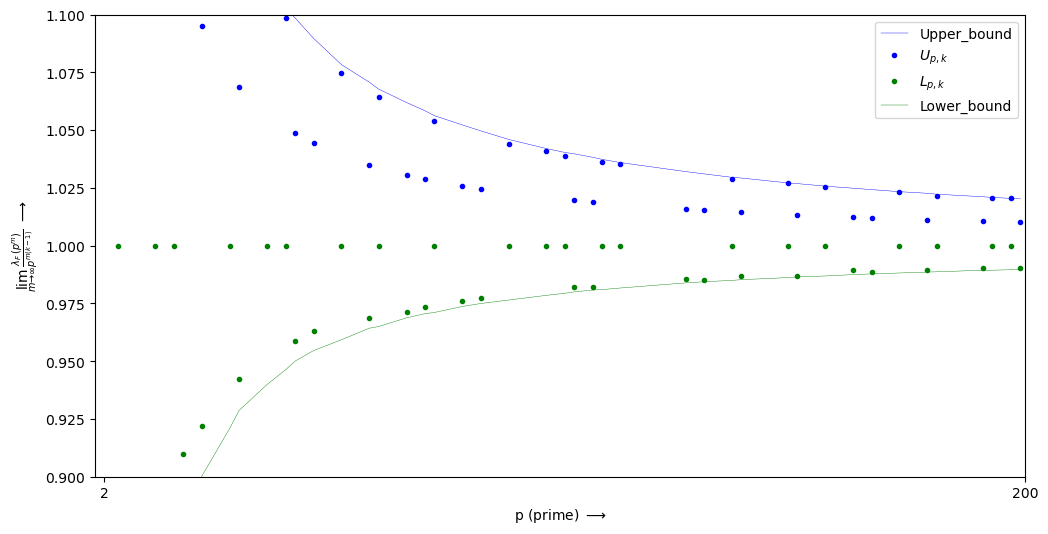

In [50]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['text.usetex'] = False
x_data=load('graph.sobj')
quantity1=[]
quantity2=[] 
quantity3=[]
quantity4=[]

x=[]
for p in x_data:
    x.append(p[0])
    quantity1.append(p[2])
    quantity2.append(p[1])
    quantity3.append(p[3])
    quantity4.append(p[4])
    
    



plt.figure(figsize=(12, 6))
plt.plot(x, quantity1, 'b-', label='Upper_bound', linewidth=0.3)
plt.plot(x, quantity2, 'b.', label=r'$U_{p, k}$', linewidth=0.3)
plt.plot(x, quantity3, 'g.', label=r'$L_{p, k}$', linewidth=0.5)
plt.plot(x, quantity4, 'g-', label='Lower_bound', linewidth=0.3)


# Set labels
plt.xlabel(r'p (prime) $\longrightarrow$')
plt.ylabel(r'$\lim_{m \to \infty} \frac{\lambda_F(p^m)}{p^{m\left(k-1\right)}} ~\longrightarrow$')


plt.ylim(0.90, 1.10)

plt.xlim(0, 37)
# Set X-axis ticks to prime numbers
#plt.xticks(x_data)
plt.xticks([2,  200])


plt.legend()
plt.savefig('prime_plot2.png')

try:
    plt.savefig('prime_plot.png', bbox_inches='tight')
    print("Plot saved successfully.")
except Exception as e:
    print(f"Error saving plot: {e}")

# Show the plot
plt.show()


### Observation
1. The upper bound seems to be strong for the primes $ p $ such that $ \chi_{-4}(p) = 1 $, though there might be a small scope for improvement for the primes $ p $ such that $ \chi_{-4}(p) = -1 $.
2. The lower bound seems to be strong for the primes $ p $ such that $ \chi_{-4}(p) = -1 $, though there might be a small scope for improvement for the primes $ p $ such that $ \chi_{-4}(p) = 1 $.
3. $L_{p, 100}\approx 1$ for all primes $p$ such that $\chi_{-4}(p)=1$.
